In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime 

# Machine Learning and the Efficient Market Hypothesis
### Hayden Hogenson
### Econ 411 - Computational Economics

Artificial intelligence (AI) and machine learning (ML) algorithms have been increasingly used as tools to help predict stock prices and returns both in academia, professional practice, and day trading throughout the last few decades. Most suited to financial time-series are a special type of recurrent neural network (RNN) called long short-term memory (LSTM) networks. This model is both the most recent to be applied and the model able to garner the highest returns (Fisher and Krauss, 2017). As the prevalence of these algorithms increases, however, the efficient market hypothesis (EMH) would imply that the ability of these algorithms to accurately predict future stock prices would decrease and thus financial returns would diminish. Studies have called stronger forms of the EMH into question, but the weak form (that all historical price related information is incorporated into a stock’s price) covers the training sets that most models use. Indeed, this decrease seems to have been documented in the literature. 

Fisher and Krauss (2017) found an inability of several models to garner positive returns (after transaction costs) past the year 2010. Most research into this area, however, has used algorithms trained on several stocks (Fisher and Krauss use every stock in the S&P 500 for at least one month between the years 1980 and 2015 for example). The reason for this is relatively obvious: neural networks and deep learning algorithms are structures especially sensitive to misspecification and are computationally and temporally expensive to train. 

Other, memory free algorithms, however, are easier to specify and have shorter training times. One such algorithm is the random forest (RF). RF models are particularly robust to overfitting and generate higher returns during recessions. This is likely due to the structure of a random forest model. The random forest model utilizes the majority decision of an ensemble of decision trees to make a final prediction. Each of these decision trees is trained on a random subset of the data which reduces the propensity of an algorithm to overfit to the data. This allows the model to filter out noise and outliers, two phenomena found in abundance in stock returns.

This paper will investigate the nature of the decline of AI and ML models’ ability to predict stock returns through two primary means. First, I narrow the scope of the output to a single stock. Thirty RF models are trained for a different stock chosen at random from the S&P 500. The accuracy of their predictions is calculated for each available year to determine an average trendline of predictability. Second, I add additional variables to the input data such as other, related stocks and macroeconomic indicators. The same process is conducted for the new models as well. It is my hypothesis that narrowing the scope and adding additional predictors will level the decrease in predictive power demonstrated by Fisher and Krauss (2017). This paper will also investigate if the RF model’s ability to remain accurate during volatile times extends to the COVID-19 pandemic. It is my hypothesis that the random forest will not have increased predictive power during the pandemic due to the widespread availability of machine learning algorithms having reduced their ability to accurately predict stock movements as the market has begun to account for their use.

[SUMMARIZE RESULTS AND DISCUSSION]

[GIVE OVERVIEW OF PAPER’S STRUCTURE]


## Literature Review
Fisher and Krauss (2017) tested the ability of a long short-term memory (LSTM) network to predict price changes for S&P 500’s constituent stocks against that of a random forest, deep neural net, and a logistic regression. Overall, they found that the LSTM outperformed the comparison models except during one key time period: the Great Recession. During the financial crisis, the random forest model not only outperformed the LSTM network but also outperformed its previous returns throughout the decade. An additional finding of Fisher & Krauss (2017) is that the ability of their algorithms to generate financial returns decreased over time, coinciding with the broad-scale availability of similar algorithms to financial investors. In years prior to 2001, the models displayed a much greater ability to generate profit and accurately determine price changes than in the 2001-2009 period (which in turn was also more predictable than the 2010 – 2015 period). Indeed, the average daily returns for both the LSTM and random forest models were negative for more than half the final period. Fisher and Krauss’s data covers the time period from 1992 until 2015, and another dire financial time has occurred since then: COVID-19.

Krauss et al. (2017) also find that RF models outperformed deep neural networks and gradient-boosted trees but an ensemble of the three outperforms all individual models. Their equally weighted ensemble method was able to generate a 73% annual return, and they point to momentum and short-term reversal effects as partial explanators for their model’s power. The authors also find, however, that after 2001, the returns from their model begin to decrease. They point to the increase in machine learning’s popularity and the cheapening of computation as possible reasons for this decline. Their final finding is that the prior five trading days have the highest explanatory value. 

Dixon et al. (2015) use deep neural networks to address some of the problems associated with artificial neural networks (ANNs) in predicting financial market movement directions. They use commodity and futures prices every five minutes from March of 1991 to September of 2014 and ultimately construct a model able to predict the direction of movement with an average accuracy of 73%. 

Huck (2010) focuses on pairs trading. Pairs trading is a market-neutral strategy involving two highly correlated assets. The trader takes a long position on one and a short on the other when the relative prices diverge. When the divergence resolves and the prices converge, profit is made. This requires the trader to be able to anticipate the directions of the assets’ movements. The author uses an ANN with input of five lagged returns to predict the cumulative return of a pair of stocks. Forecasts are generated for all pairs of stocks in the dataset. These pairs are then ranked and selected based on predicted returns before being traded. The paper’s main contribution is its development of multi-step-ahead forecasts, but the author also finds a decrease in performance after 2002.

Moritz and Zimmermann (2016) apply the RF algorithm to conditional portfolio sorts in order to predict stock returns one month ahead. Tree-based conditional portfolio sorts can account for both correlation and interaction between variables. This kind of model is also able to handle a large amount of input variables and nonlinear relationships. They conduct tests for predictor variable importance by re-estimating the forest with each variable omitted. They find that the most important variables are the monthly returns from the most recent 4 months and from a year prior. 


## Data and Methods
Historical stock price data is taken from Yahoo Finance. The adjusted close price is used as the time series. To normalize the data, stock prices are logged and differenced. Each RF will be given the returns from the last five periods as predictor variables. The addition of other, related stocks is determined by the “Similar to…” section of the stock’s Yahoo Finance page. These variables are similarly transformed. These variables are added as predictors in the second set of RF models. Macroeconomic variables are taken from FRED. These variables are differenced in order to normalize the data and make it stationary. For variables not reported on a daily basis, the data is resampled using a forward fill method. Each stock is given the same macroeconomic indicators, and while these variables may be more appropriate in the prediction of some stocks over others, this is not an issue because the goal is to determine the average effect of their inclusion.

In [2]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()
var_list = ["UNRATE", "CPALTT01USM657N", "A939RX0Q048SBEA", "REAINTRATREARAT10Y", "MORTGAGE30US", "AIRRPMTSID11"]
var_df = pd.DataFrame()
for var in var_list:
    var_data = web.DataReader(var, "fred", start, end)
    var_data = var_data.diff().resample("W").ffill()
    var_df[[var]] = var_data
var_df.rename( columns = {"UNRATE":"UNRATE", "CPALTT01USM657N":"CPI", "A939RX0Q048SBEA":"RGDPCAP", "REAINTRATREARAT10Y":"REALINT", "MORTGAGE30US":"MORT", "AIRRPMTSID11":"AIRPASS"}, inplace = True)

Even though it is out of order with respect to the rest of the paper, the above code must be run before pulling the stock information because of the "yf.pdr_override()" method that must be called to resolve the issues with pulling data from Yahoo Finance.

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

stock_list = ["WYNN", "MGM", "LVS", "PENN"]
stock_df = pdr.get_data_yahoo(stock_list, start = start, end = end)["Adj Close"].resample("W").first()
stock_df = np.log(stock_df).diff(4)
stock_df

[*********************100%***********************]  4 of 4 completed


,LVS,MGM,PENN,WYNN
Date,,,,
2000-01-09,NaN,NaN,NaN,NaN
2000-01-16,NaN,NaN,NaN,NaN
2000-01-23,NaN,NaN,NaN,NaN
2000-01-30,NaN,NaN,NaN,NaN
2000-02-06,NaN,-0.132776,-0.148683,NaN
...,...,...,...,...
2023-03-26,-0.024977,-0.028078,-0.111433,0.004563
2023-04-02,-0.031922,-0.026252,-0.068044,0.011349
2023-04-09,-0.020564,-0.023231,-0.034903,-0.018100


For the dataset, thirty stocks are chosen from the S&P 500. This is not completely at random, however, as the timeline of the decrease observed in the literature requires data from before the year 2000. While this does introduce some survivorship bias into the sample, the relationship between a long history in the index and the ability of the various methods employed herein to resolve the decrease is not obvious. While an effect from this bias cannot be ruled out, I see no way to resolve it without shortening the time under consideration. The S&P 500 is first reduced to only those stocks with data from prior to the year 2000, and thirty unique stocks are chosen from this list at random to create the final sample. These stocks are: [LIST STOCKS HERE].

In [26]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500 = sp500[sp500["Date added"] <= "2001-01-01"]
sp500 = sp500.reset_index()
sp500

,index,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
2,6,ADM,ADM,Consumer Staples,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
3,7,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
4,8,ADP,ADP,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
...,...,...,...,...,...,...,...,...,...
188,489,WRK,WestRock,Materials,Paper & Plastic Packaging Products & Materials,"Atlanta, Georgia",1957-03-04,1732845,2015
189,492,WMB,Williams Companies,Energy,Oil & Gas Storage & Transportation,"Tulsa, Oklahoma",1975-03-31,107263,1908
190,494,GWW,W. W. Grainger,Industrials,Industrial Machinery & Supplies & Components,"Lake Forest, Illinois",1981-06-30,277135,1927
191,496,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909


In [28]:
del sp500["index"] 
del sp500["Headquarters Location"] 
del sp500["GICS Sub-Industry"]
sp500

,Symbol,Security,GICS Sector,Date added,CIK,Founded
0,MMM,3M,Industrials,1957-03-04,66740,1902
1,ABT,Abbott,Health Care,1957-03-04,1800,1888
2,ADM,ADM,Consumer Staples,1957-03-04,7084,1902
3,ADBE,Adobe Inc.,Information Technology,1997-05-05,796343,1982
4,ADP,ADP,Industrials,1981-03-31,8670,1949
...,...,...,...,...,...,...
188,WRK,WestRock,Materials,1957-03-04,1732845,2015
189,WMB,Williams Companies,Energy,1975-03-31,107263,1908
190,GWW,W. W. Grainger,Industrials,1981-06-30,277135,1927
191,XEL,Xcel Energy,Utilities,1957-03-04,72903,1909


In [38]:
import random
stock_list = []
while len(stock_list) < 30:
    num = random.randint(0,len(sp500.index))
    if not sp500.iloc[num]["Symbol"] in stock_list:
        stock_list.append(sp500.iloc[num]["Symbol"])
stock_list, len(stock_list)

(['IFF',
  'COP',
  'TAP',
  'ED',
  'PKI',
  'EFX',
  'MMM',
  'PH',
  'SLB',
  'PEP',
  'BBY',
  'HD',
  'SWK',
  'LUV',
  'MCK',
  'BSX',
  'CPB',
  'ADP',
  'DVN',
  'APD',
  'CCL',
  'JNJ',
  'TFC',
  'HES',
  'PPG',
  'EMR',
  'MRK',
  'IPG',
  'IBM',
  'NTRS'],
 30)

array([[<AxesSubplot: title={'center': 'LVS'}>,
        <AxesSubplot: title={'center': 'MGM'}>],
       [<AxesSubplot: title={'center': 'PENN'}>,
        <AxesSubplot: title={'center': 'WYNN'}>]], dtype=object)

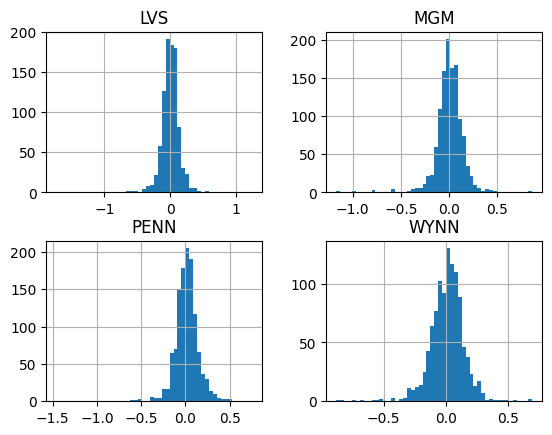

In [4]:
stock_df.hist(bins=50)

As mentioned previously, various macroeconomic indicators are added to the third and final set of RF models. 

[VISUALIZATIONS]

In [5]:
var_df

,UNRATE,CPI,RGDPCAP,REALINT,MORT,AIRPASS
DATE,,,,,,
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-16,NaN,NaN,NaN,NaN,0.03,NaN
2000-01-23,NaN,NaN,NaN,NaN,0.08,NaN
2000-01-30,NaN,NaN,NaN,NaN,-0.01,NaN
...,...,...,...,...,...,...
2023-02-05,0.2,-0.241325,NaN,-0.362897,-0.04,NaN
2023-02-12,0.2,NaN,NaN,-0.362897,0.03,NaN
2023-02-19,0.2,NaN,NaN,-0.362897,0.20,NaN


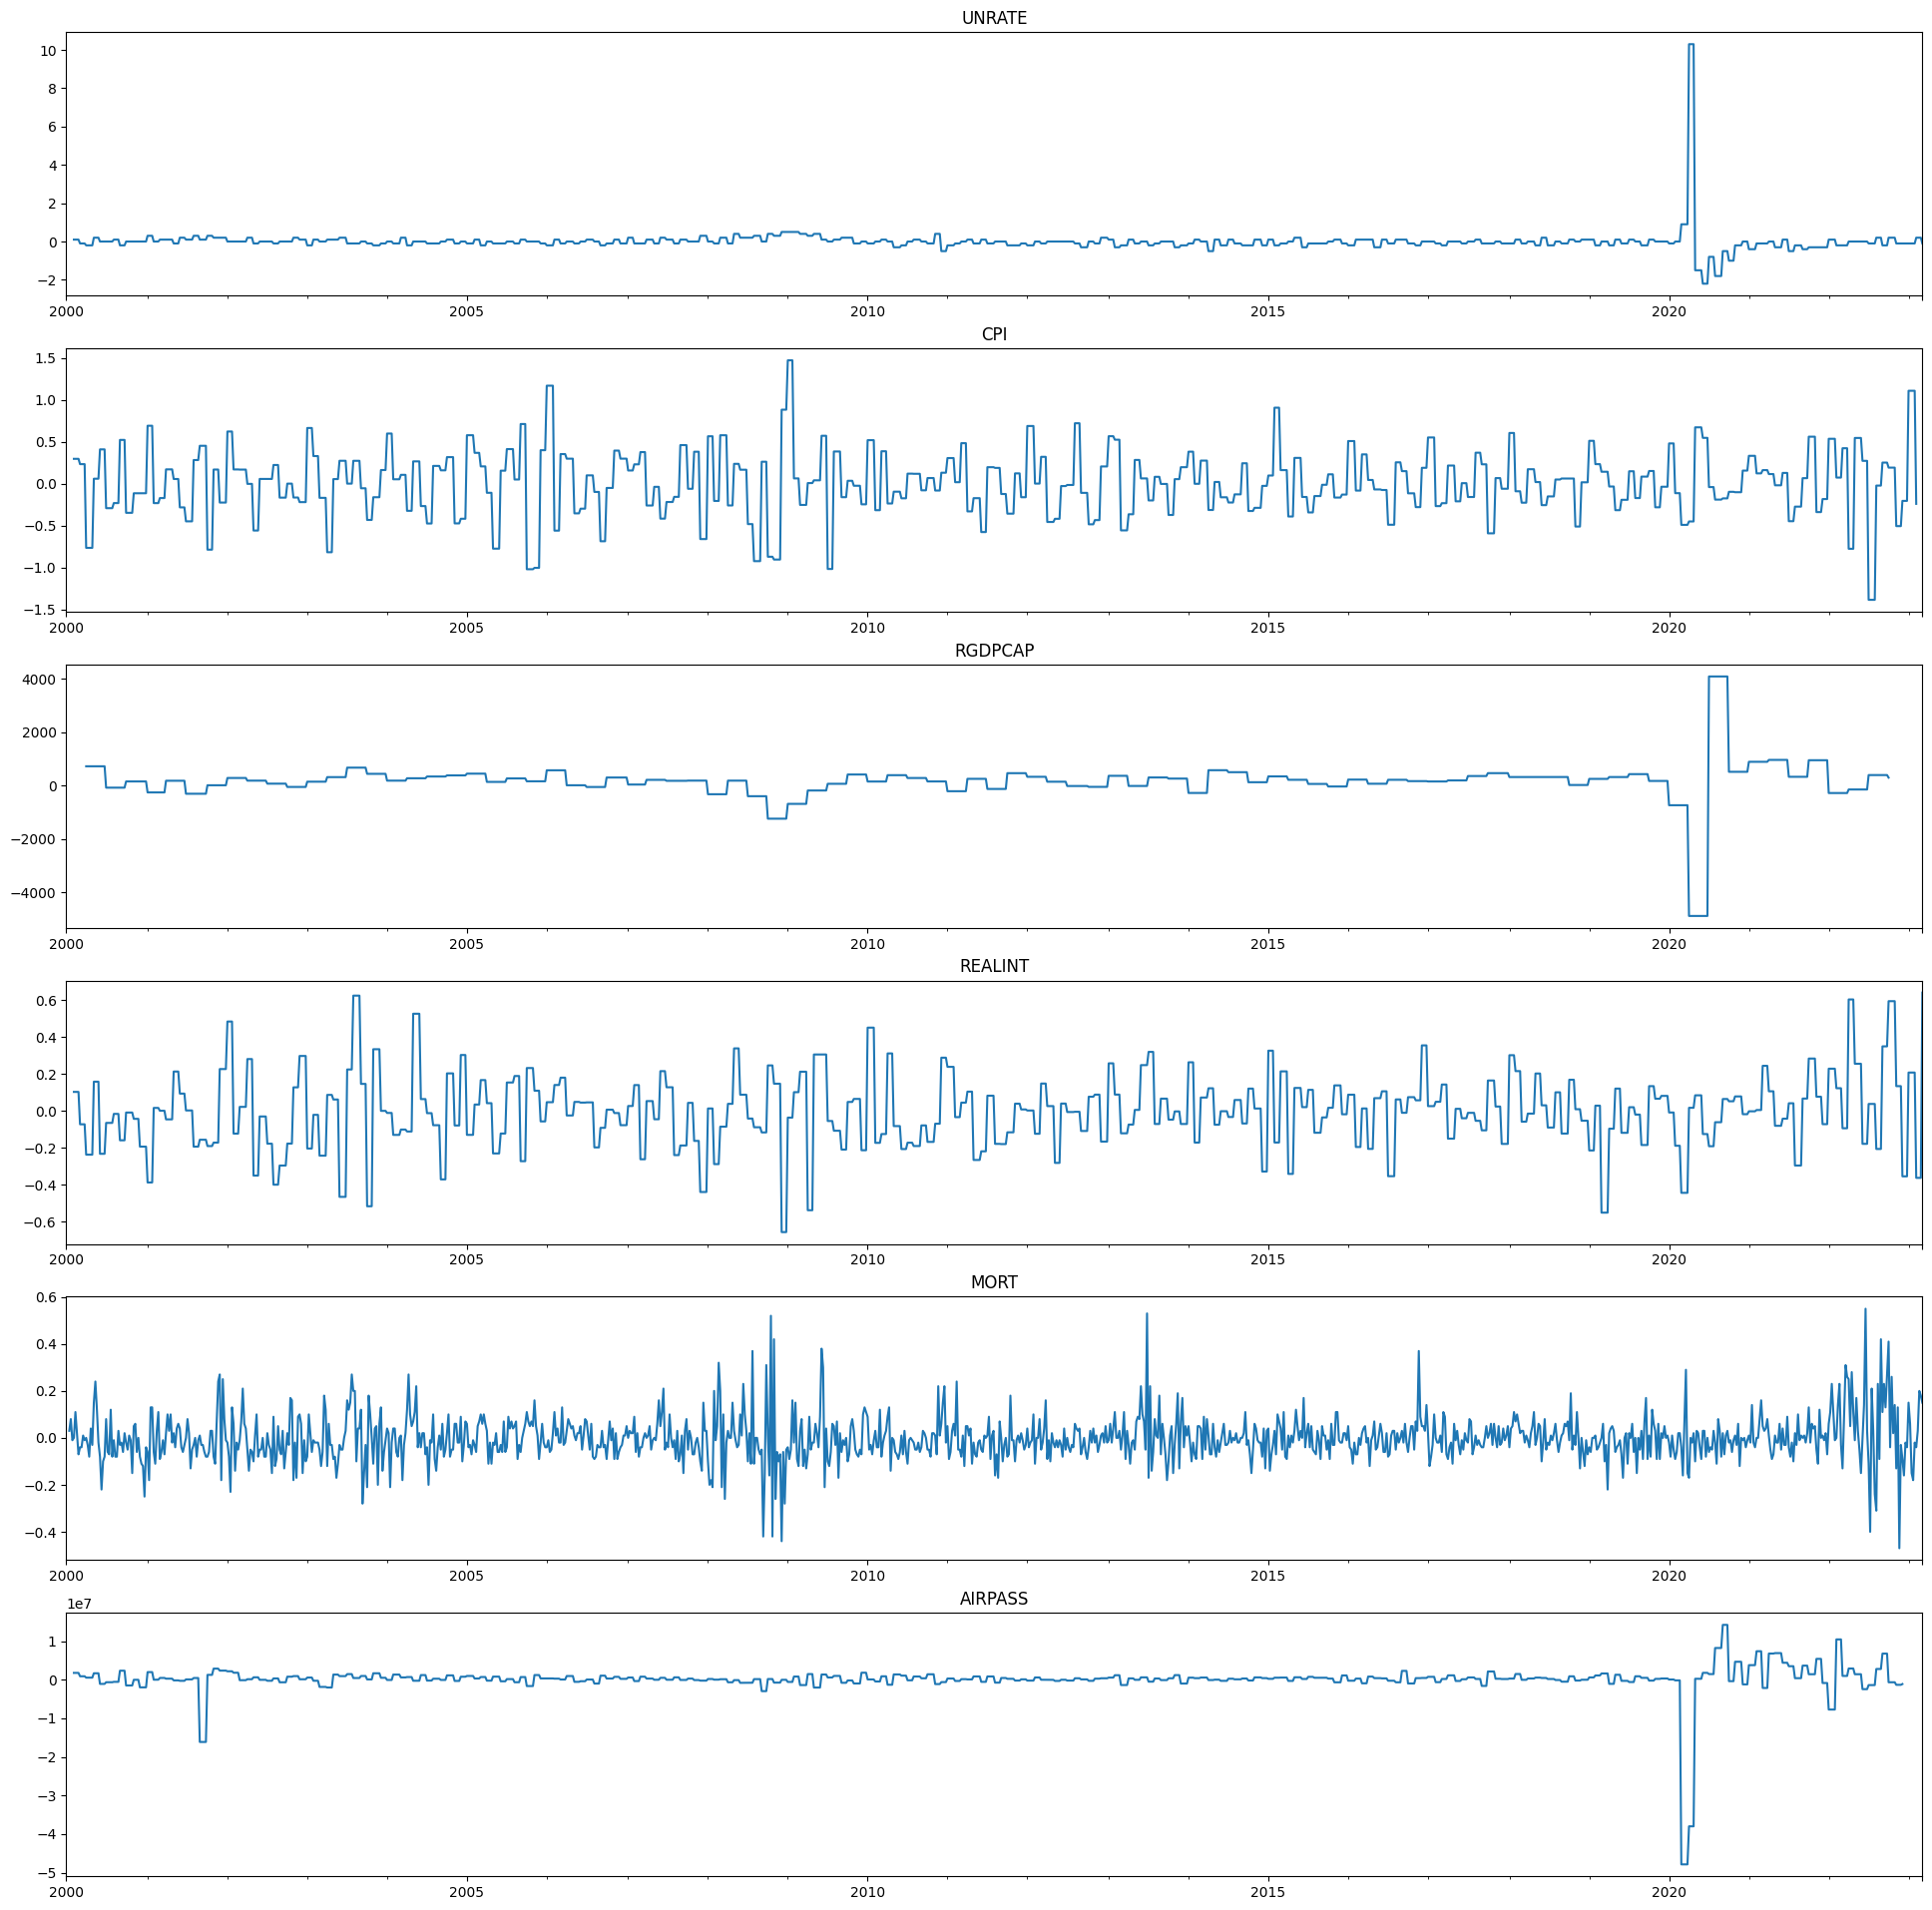

In [6]:
fig, axs = plt.subplots(6, figsize = (24,24))
i = 0
for column in var_df:
    var_df[column].plot.line(ax = axs[i], title = column)
    axs[i].set(xlabel=None)
    i = i + 1

C:\Users\hthog\AppData\Local\Temp\ipykernel_1560\3835505808.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  var_df.hist(bins=10, ax=ax)


array([[<AxesSubplot: title={'center': 'UNRATE'}>,
        <AxesSubplot: title={'center': 'CPI'}>],
       [<AxesSubplot: title={'center': 'RGDPCAP'}>,
        <AxesSubplot: title={'center': 'REALINT'}>],
       [<AxesSubplot: title={'center': 'MORT'}>,
        <AxesSubplot: title={'center': 'AIRPASS'}>]], dtype=object)

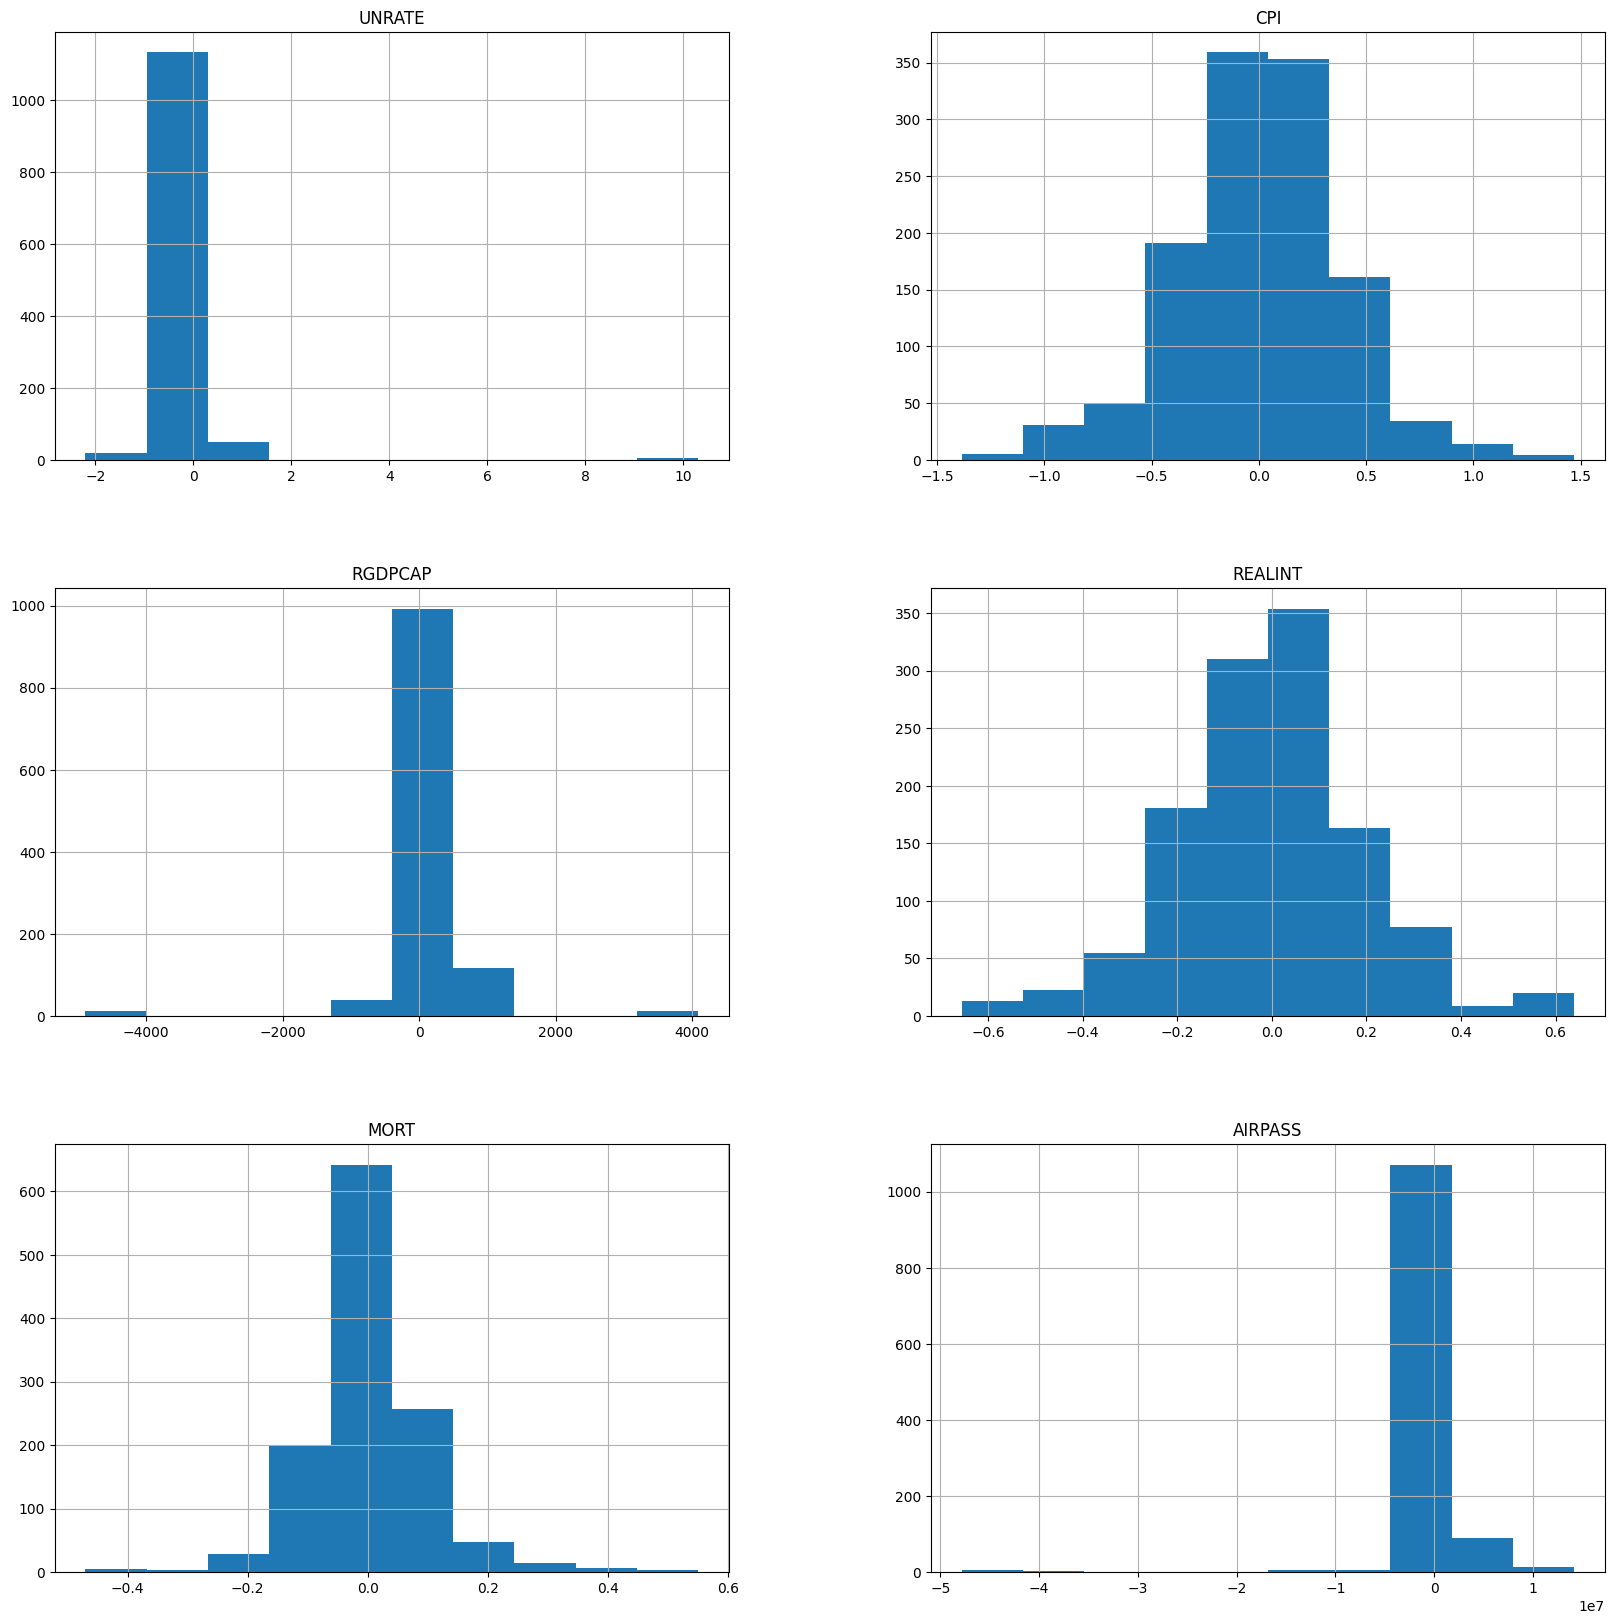

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
var_df.hist(bins=10, ax=ax)

In [8]:
stock_df[["UNRATE", "CPI", "RGDPCAP", "REALINT", "MORT", "AIRPASS"]] = var_df
stock_df[["Y-1"]] = stock_df[["WYNN"]].shift(1)
stock_df[["Y-2"]] = stock_df[["WYNN"]].shift(2)
stock_df[["Y-3"]] = stock_df[["WYNN"]].shift(3)
stock_df[["Y-4"]] = stock_df[["WYNN"]].shift(4)
stock_df[["Y-5"]] = stock_df[["WYNN"]].shift(5)
stock_df[["Y-6"]] = stock_df[["WYNN"]].shift(6)
stock_df[["Y30"]] = stock_df[["WYNN"]].shift(-4)
stock_df

,LVS,MGM,PENN,WYNN,UNRATE,CPI,RGDPCAP,REALINT,MORT,AIRPASS,Y-1,Y-2,Y-3,Y-4,Y-5,Y-6,Y30
Date,,,,,,,,,,,,,,,,,
2000-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-06,NaN,-0.132776,-0.148683,NaN,0.1,0.295329,NaN,0.102292,0.00,1756857.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26,-0.024977,-0.028078,-0.111433,0.004563,NaN,NaN,NaN,NaN,NaN,NaN,-0.028119,0.114258,0.056543,0.066164,0.108844,0.087347,0.033796
2023-04-02,-0.031922,-0.026252,-0.068044,0.011349,NaN,NaN,NaN,NaN,NaN,NaN,0.004563,-0.028119,0.114258,0.056543,0.066164,0.108844,NaN
2023-04-09,-0.020564,-0.023231,-0.034903,-0.018100,NaN,NaN,NaN,NaN,NaN,NaN,0.011349,0.004563,-0.028119,0.114258,0.056543,0.066164,NaN


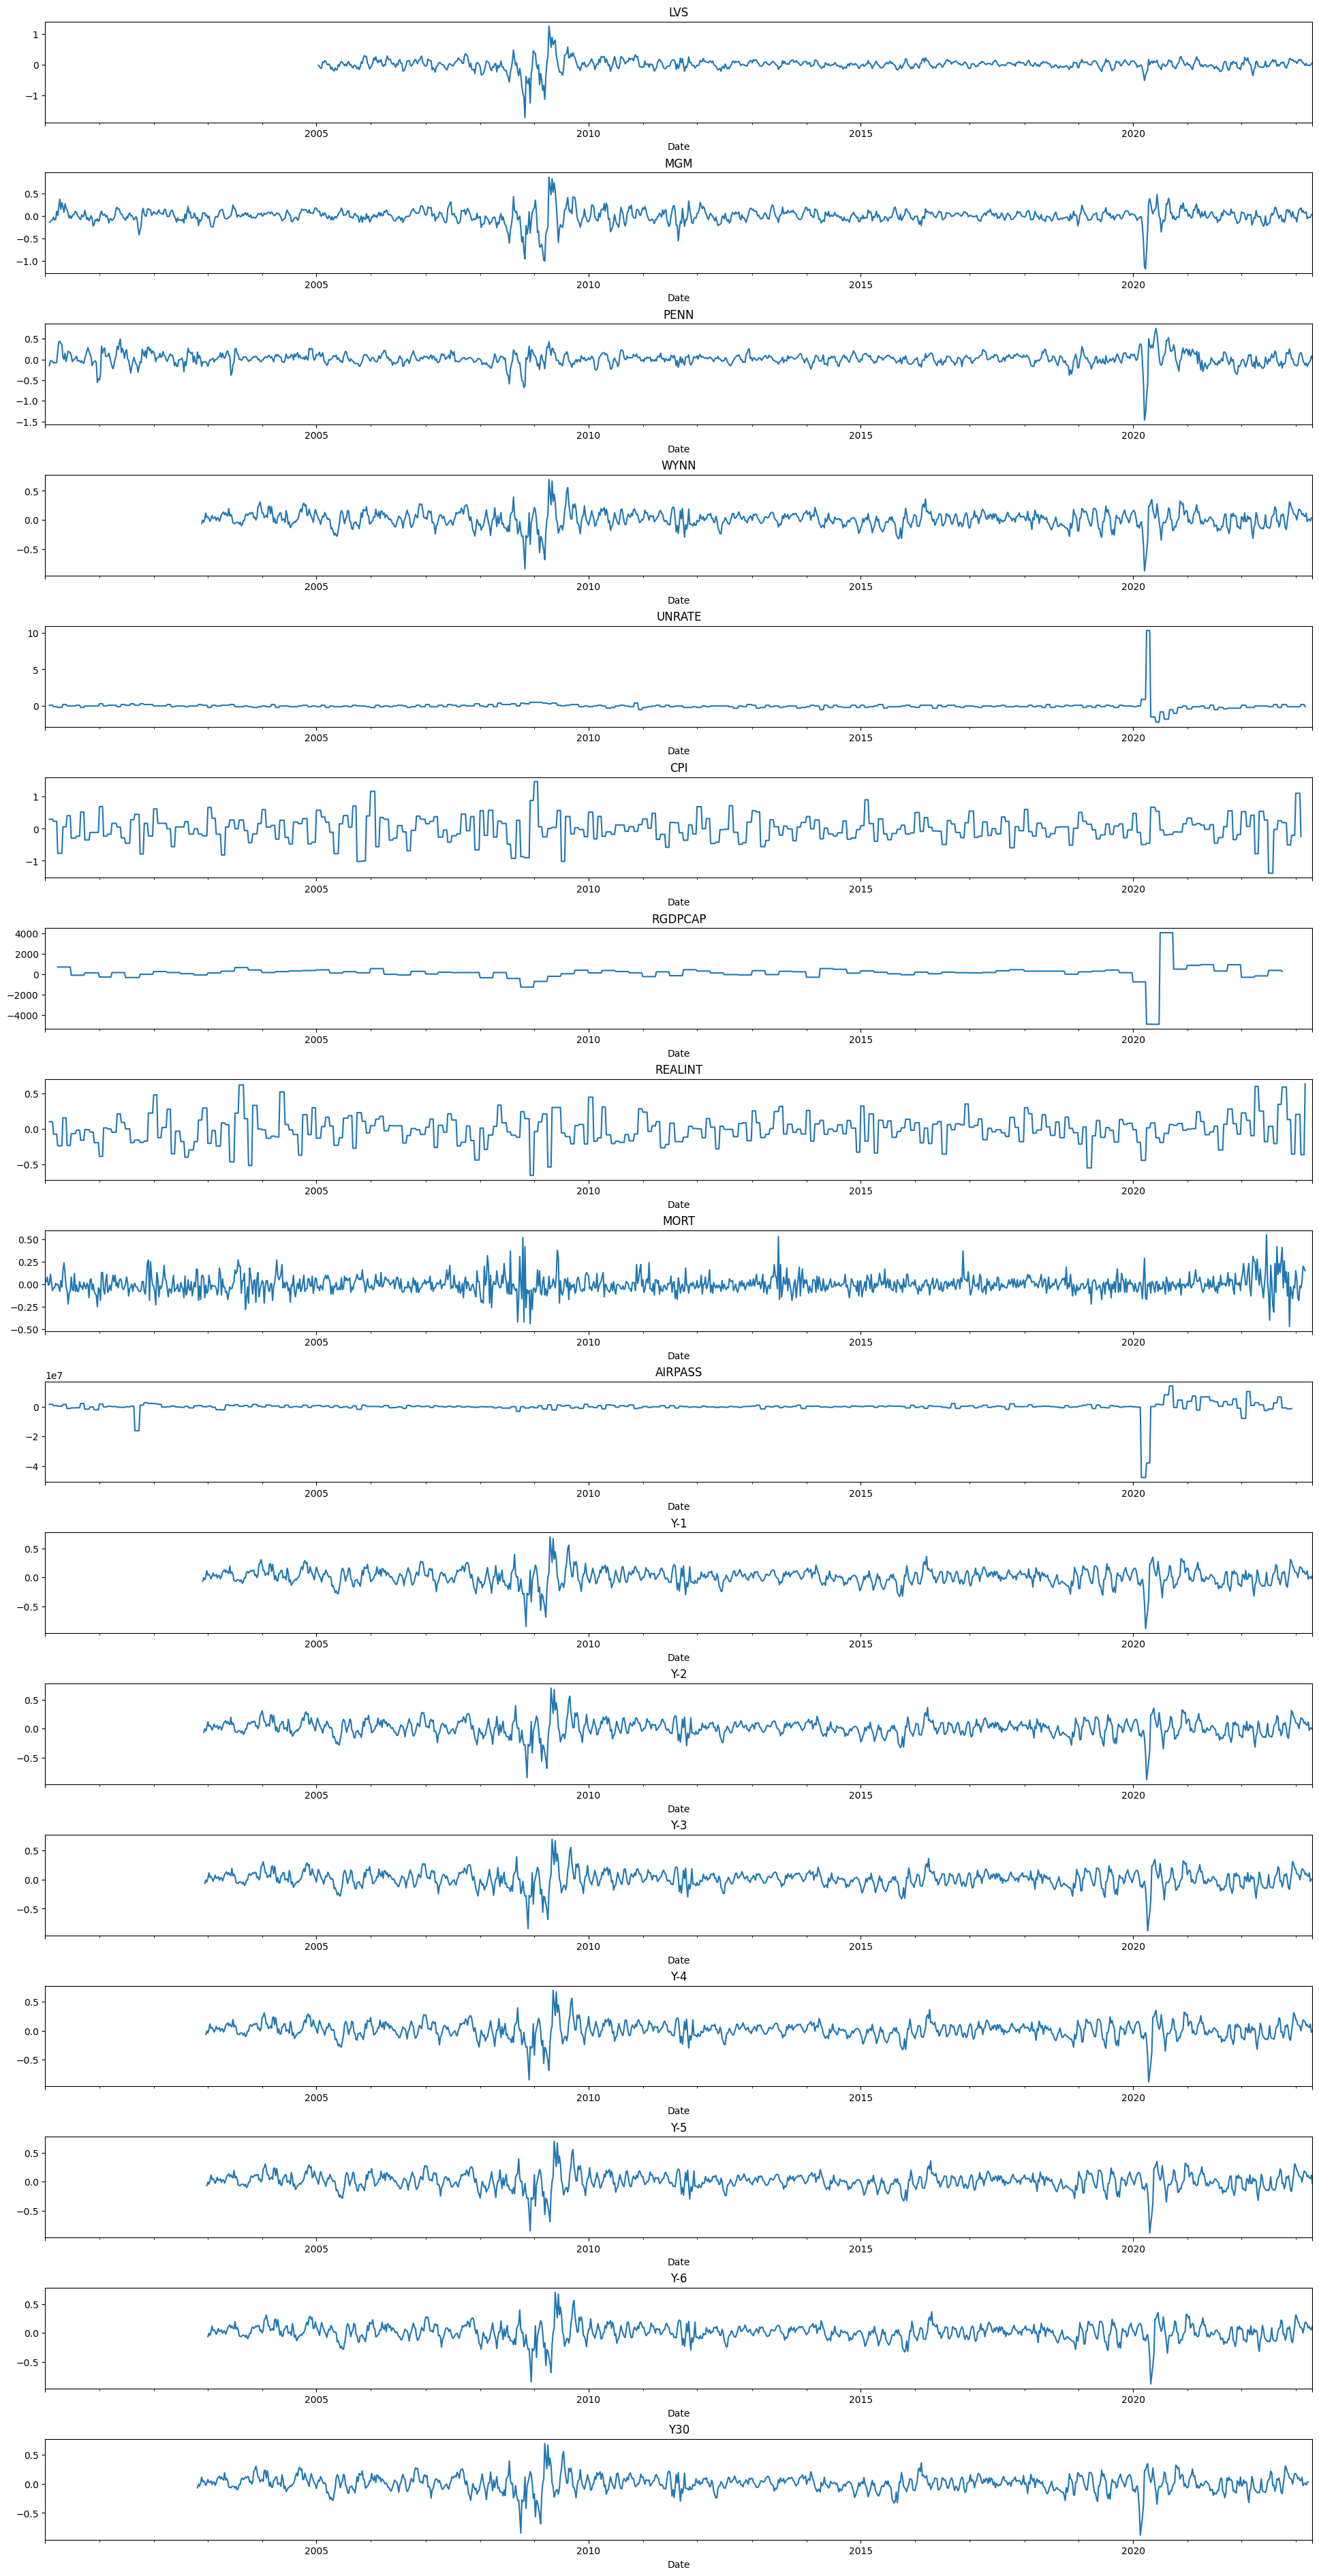

In [9]:
fig, axs = plt.subplots(len(stock_df.columns), figsize = (24,48))
fig.subplots_adjust(hspace=0.5)
i = 0
for column in stock_df:
    axs[i].set(xlabel=None)
    stock_df[column].plot.line(ax = axs[i], title = column)
    i = i + 1

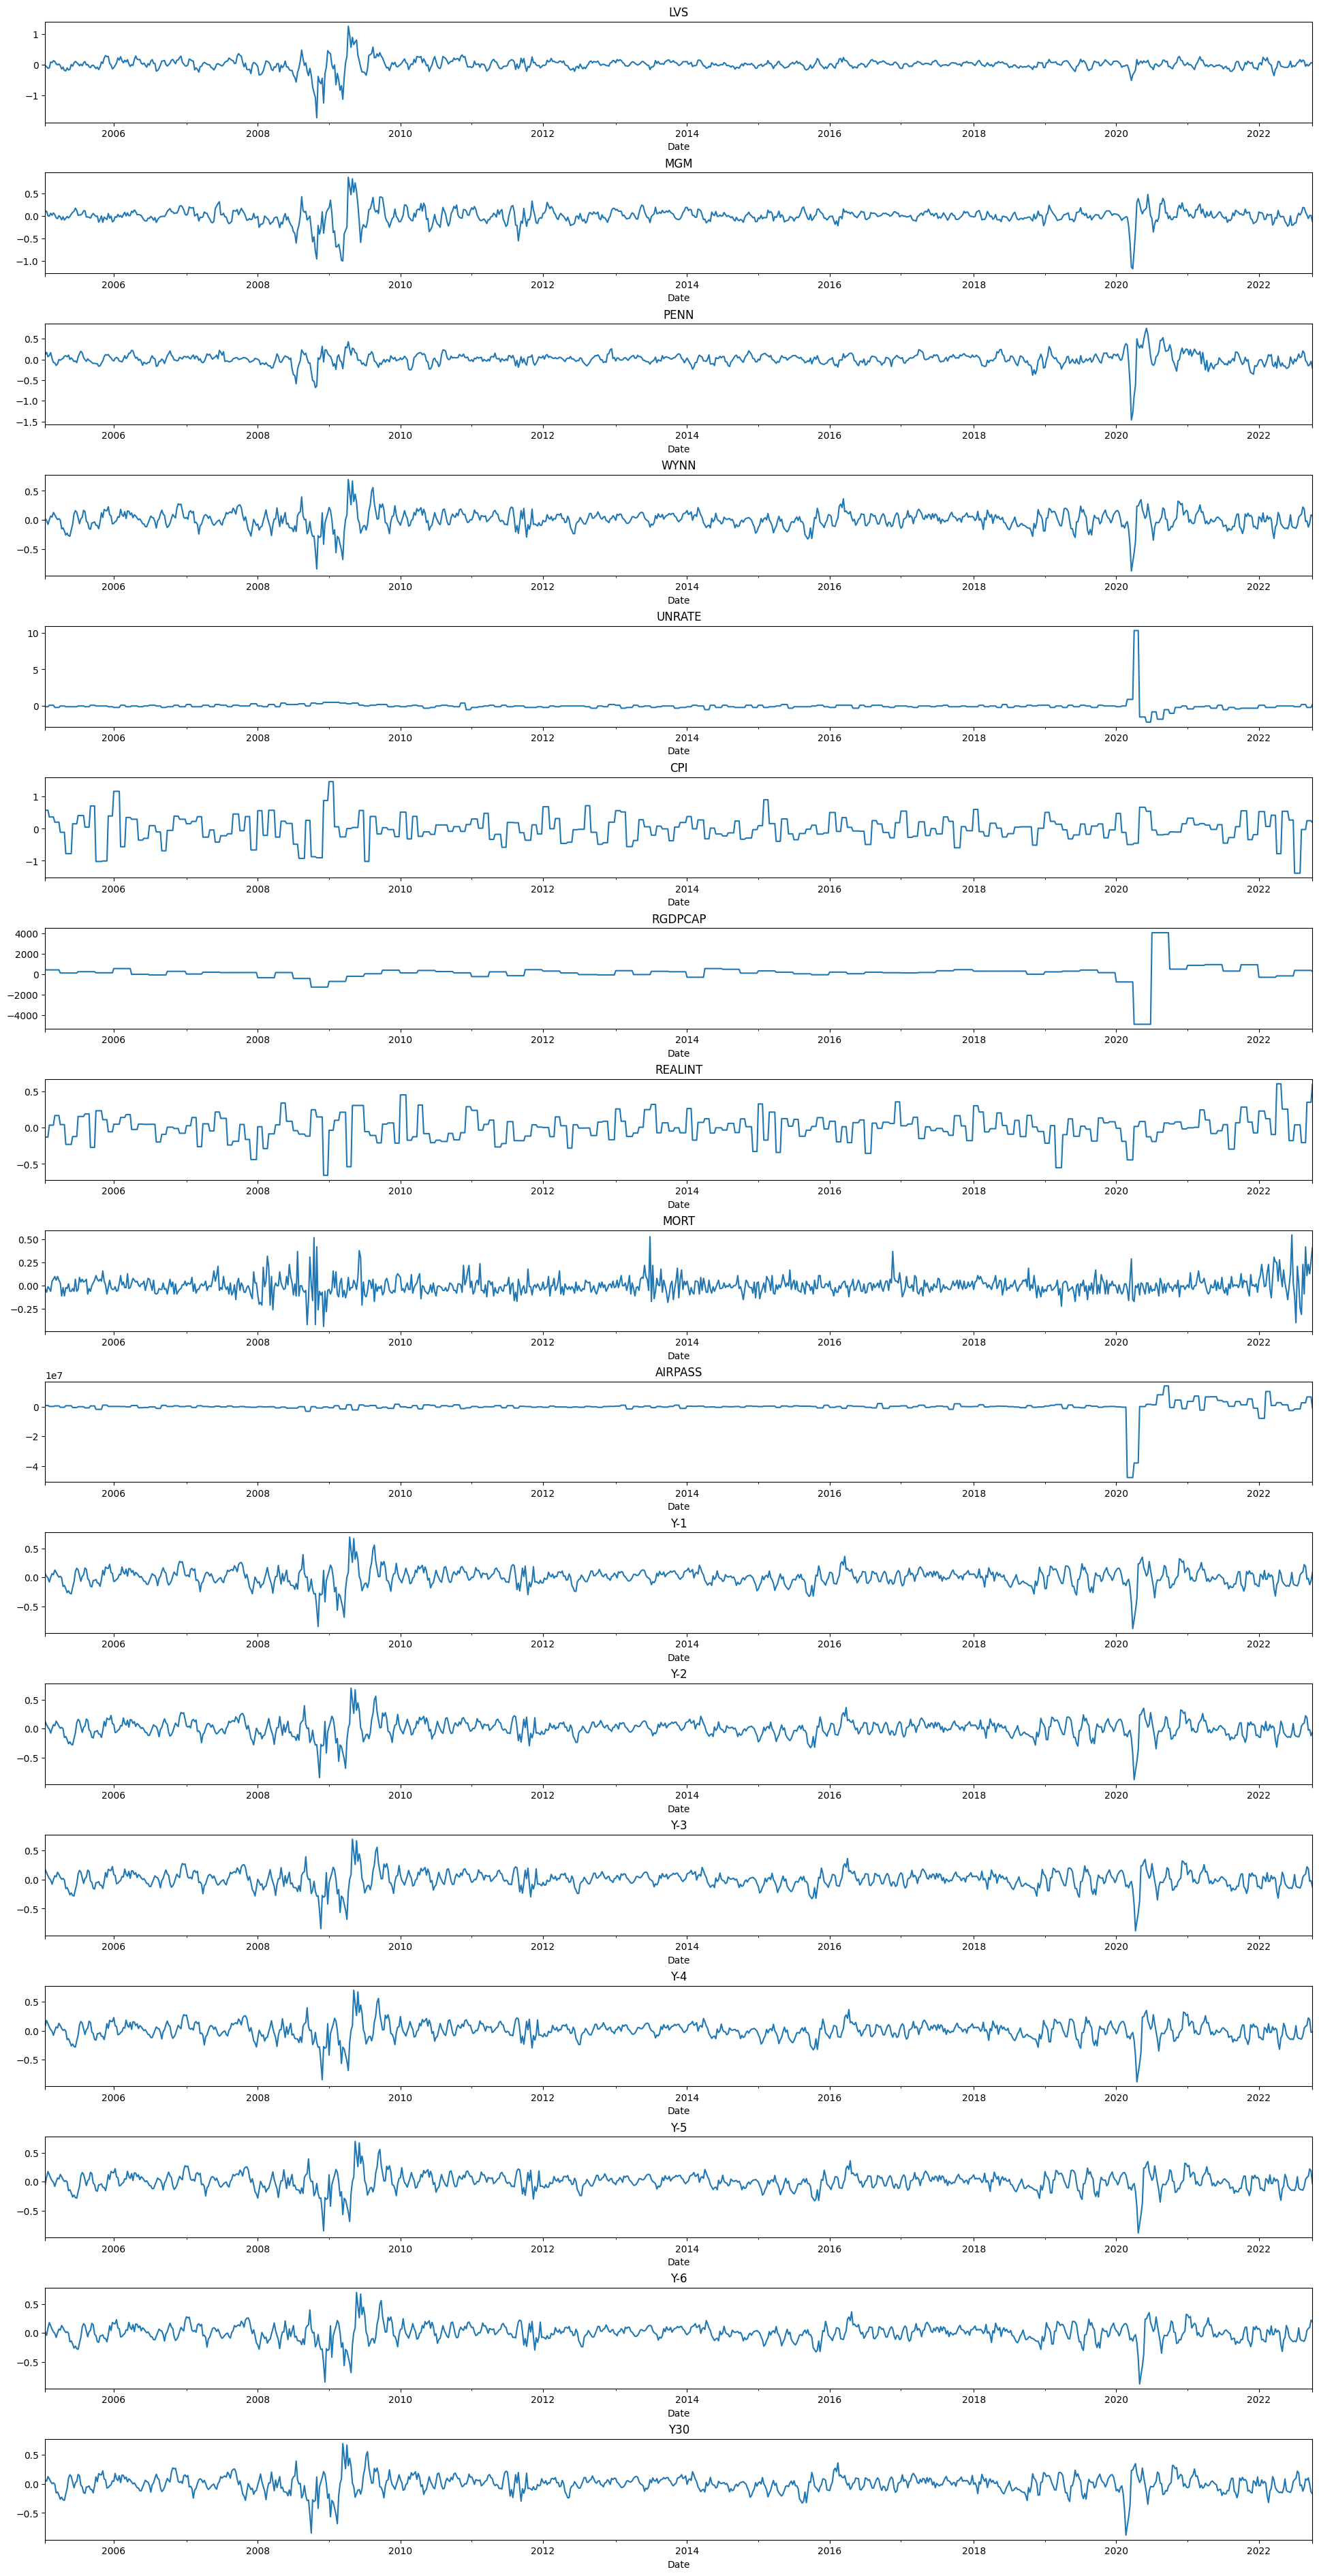

In [10]:
stock_df = stock_df.dropna(axis=0, how="any")

fig, axs = plt.subplots(len(stock_df.columns), figsize = (24,48))
fig.subplots_adjust(hspace=0.5)
i = 0
for column in stock_df:
    axs[i].set(xlabel=None)
    stock_df[column].plot.line(ax = axs[i], title = column)
    i = i + 1

As can be seen from the plots of the differenced variables, some of the variables that experienced large changes and volatility during the COVID-19 pandemic did not experience drastic changes during the Great Recession. Other variables (MORT for instance), however, experience relatively large amounts of volatility on a regular basis but do see increased volatility during those two periods. 

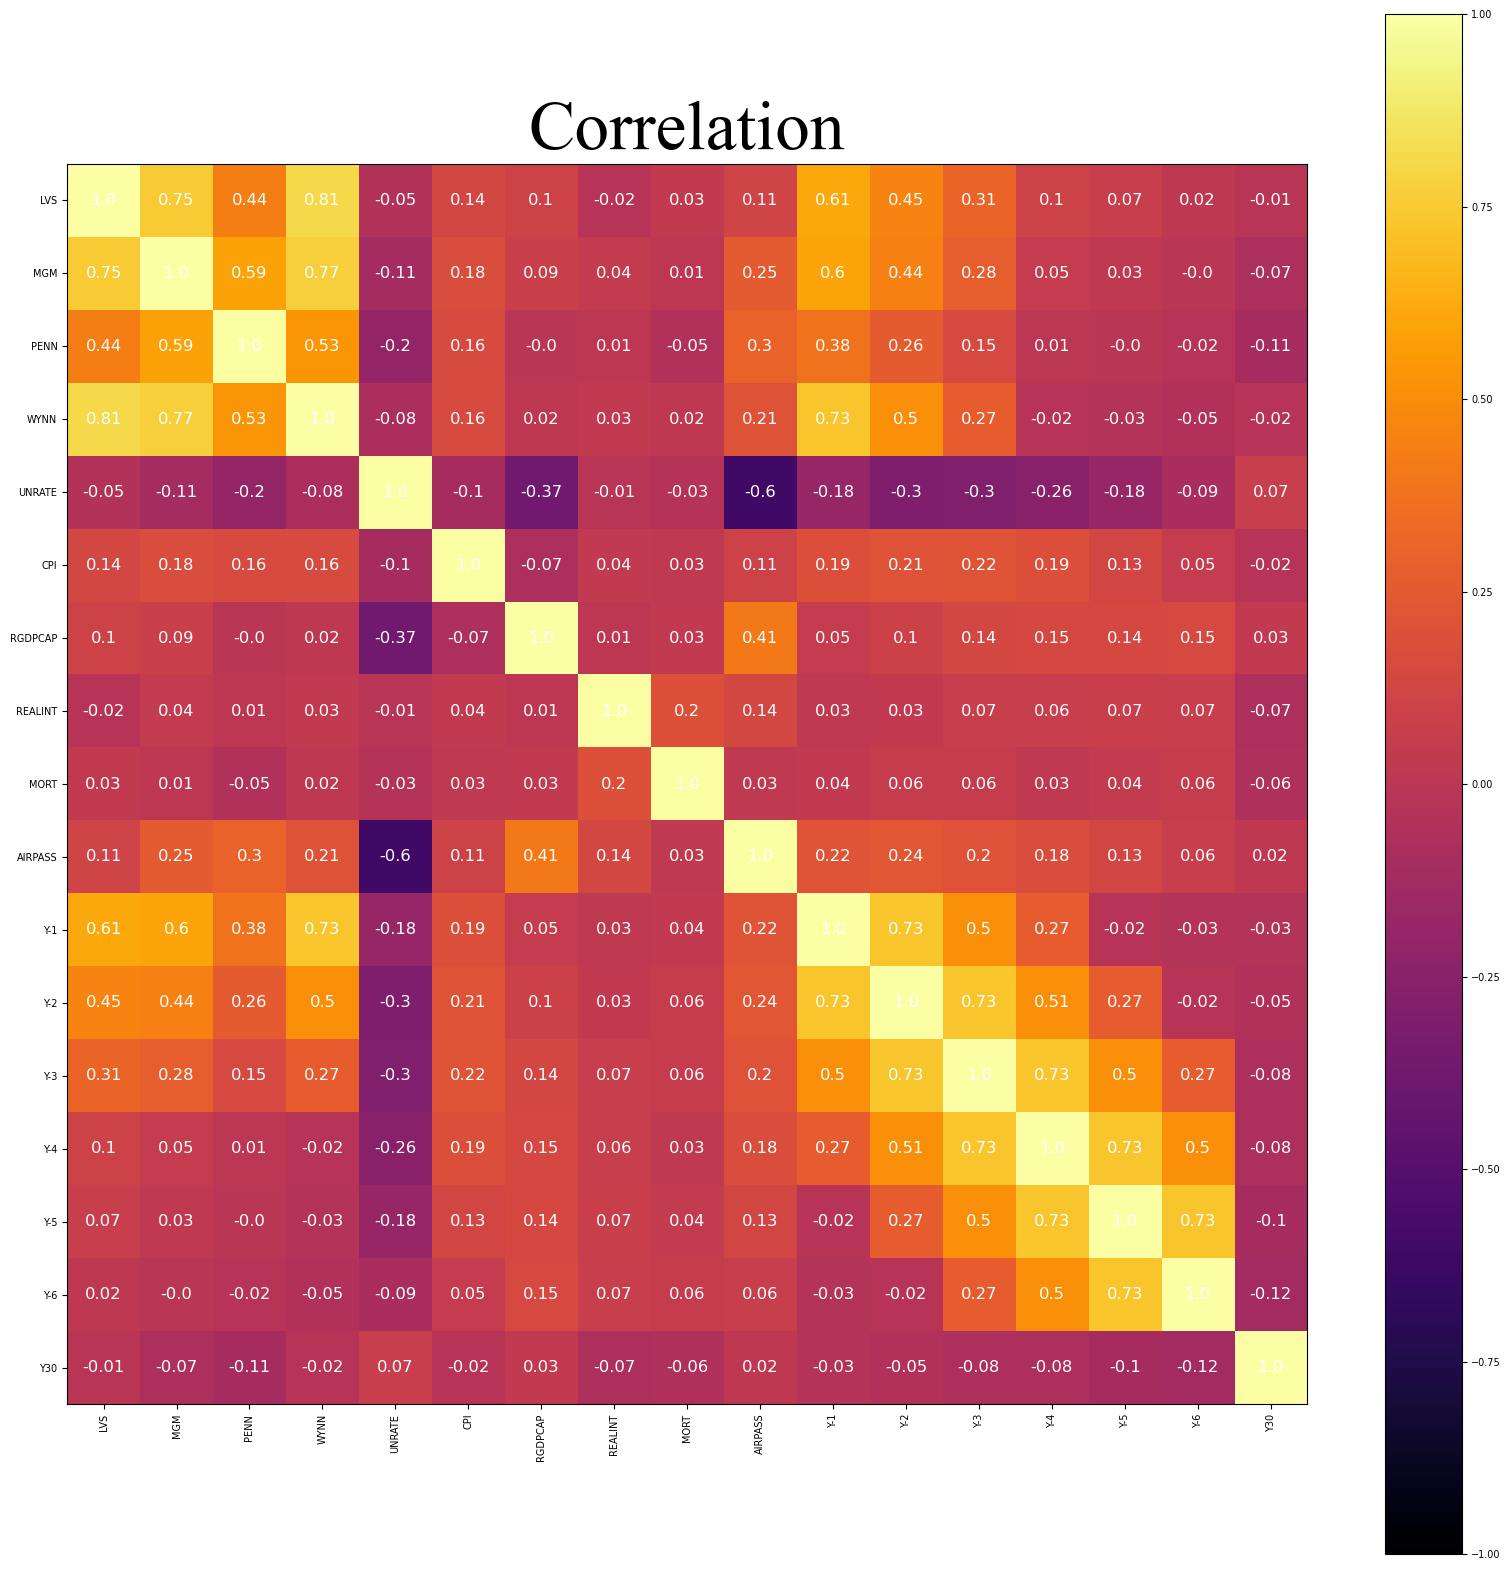

In [11]:
def corr_matrix_heatmap(data, dim = 20):
        fig, ax = plt.subplots(figsize = (dim,dim))
        im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "inferno")  
        labels = data.keys()
        num_vars = len(labels)
        tick_labels = [label.replace(" ","\n") for label in labels]
        tick_font_size = 120 / num_vars
        val_font_size = 200 / num_vars
        plt.rcParams.update({'font.size': tick_font_size})
        xticks = np.arange(num_vars)
        plt.xticks(xticks, tick_labels, fontsize = tick_font_size, rotation=90)
        yticks = np.arange(num_vars)
        plt.yticks(yticks, tick_labels, fontsize = tick_font_size)
        # put all options chosen above into use and create figure
        for i in range(len(labels)):
            for j in range(len(labels)):
                text = ax.text(i,j, str(round(data.values[i][j], 2)),
                              fontsize = val_font_size, ha = "center",
                               va = "center", color = "w")
        title_font = {"fontname":"Times New Roman"}  
        plt.title("Correlation", fontsize = 50, **title_font)   
        cbar = fig.colorbar(im)
        plt.show()
        
corr_matrix_heatmap(stock_df.corr(), dim = 20)

As touched on previously, a random forest model works by developing several decision trees trained on random subsets of the data. Each tree not only has access to a random subset of observation but also a limited number of variables. The final decision of the model is the decision held by the majority of the decision trees. To predict the outcomes of new data, the new variable must be run through each decision tree and the final “vote” taken. This kind of ensemble method results in a model that is robust to noise and outliers in the data and is less likely to overfit the data. Overfitting is when a model is overly specialized in the training data and, as a result, performs poorly on new data given. The benefits of this kind of robustness are especially obvious when thought of in conjunction with something like a recession or pandemic.

In order to construct a random forest, the dataset is subdivided into training and testing sets. The algorithm uses the training set to construct the decision trees and uses the testing set to evaluate the performance of the algorithm. The algorithm selects a random portion of the independent variables provided in the input. This reduces the correlation between the decision trees, helping to avoid overfitting the model. The number of features each tree has access to is up to the programmer but is usually set to the square root of the number of independent variables. Using these randomly selected features, the algorithm builds decision trees based on portion of the training set created earlier. This is done through a process called recursive partitioning. 

Recursive partitioning divides the dataset into increasingly smaller subsets based on the values of the independent variables. The algorithm uses Gini impurity to choose the split point that maximizes the separation of the data into subsets. Gini impurity measures the probability that a randomly chosen observation from the data has been misclassified based on the distribution of the dependent variable for the current sample. The splitting point is determined by finding the feature and value combination that minimizes the Gini impurity of the data after the split. 

Each observation in the dataset is sorted into the resulting subsets based on their relative value for that feature (observations with a value higher than the split point are placed in one subset, and those with lower values in another). This process is repeated until a stopping criterion is met. In the trees created herein, the stopping criterion is the maximum depth of the tree, 20. Once the stopping criterion is met, the algorithm assigns the last nodes in the tree a value based on those remaining in the subsets. One can then obtain the resulting decision tree’s prediction by starting at the root node and traveling down the tree, classifying the observation in the process. The label attached to the final node gives the prediction. This is done for each tree in the forest and the resulting predictions are averaged to obtain the final prediction. This process is conducted for each of the thirty randomly chosen stocks a total of three times: first, with only lagged dependent variables as the input; second, with the addition of other, related stocks; and third, with the addition of macroeconomic variables. 

Feature Importance Plots can be generated from the RF models. These plots show the relative importance of each feature to the accuracy of an RF model’s predictions, and the scores generated for each feature take on values that sum to one. For an RF model, feature importance is calculated as the weighted average value of the reduction in impurity in each decision tree weighted by the sample size processed by the tree.

Next, R-squared and Mean Absolute Error (MAE) values are calculated for each stock in each year. These are averaged to produce overall timelines for the years in the dataset. This is constructed for each of the three sets of RF models. Accuracy measures are calculated for the entirety of the year in question regardless of whether an observation was in the training or testing subsets. While this may inflate the value of the accuracy measures, it is the relative performances that are of interest, but the timelines are recreated using only data from the testing subset in the robustness checks.


## Results
[FOCUSING ON SINGLE STOCKS]

[ADDITION OF RELATED STOCKS]

[ADDITION OF MACRO VARIABLES]

[SPECIFICALLY DISCUSS GREAT RECESSION AND COVID-19]


## Robustness Checks

Three robustness checks are also conducted to test the strength of the results. First, the accuracy timelines are recreated using only data from the testing subset. This provides a more accurate measurement of the models’ predictive power as the value of the models is their ability to make predictions on unseen data.

The second check increases the prediction time to thirty days. Presumably, this will determine whether the observed trends in predictability are present beyond short-term volatility in prices or if relatively longer-term trends are still predictable. 

The final robustness check reduces the models’ predictions from return values to movement direction (i.e., whether the stock price goes up or down regardless of movement magnitude). This simplifies the task while still providing a useful output. If accurate movement directions can be determined, that would isolate the observed trends in predictability to the magnitude of the price changes. A confusion matrix can then be generated from the resulting models. A confusion matrix is a table that classifies observations into true positives, false positives, true negatives, and false negatives. These values allow other accuracy measures to be calculated such as the accuracy, precision, recall, and F1 score. Accuracy measures the proportion of true predictions out of all predictions. Precision measures the proportion of true positives out of all positive predictions. Recall measures the proportion of true positives out of all actual positives. Finally, the F1 score is the harmonic mean of precision and recall. 


## Conclusion

## References